# Part II - Common Questions about Loans
## by Jasmine W.

## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook (i.e., an executive summary). This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights listed here should match those documented at the conclusion of the exploratory analysis notebook. 


## Dataset Overview and Executive Summary

> Briefly introduce your dataset here. Include a summary of findings that your visualizations will support.

> **Rubric Tip**: The key insights can be in a bulleted or numbered list for ease of review.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
import zipfile

# opens zip file in read-mode
with zipfile.ZipFile("prosperLoanData.zip", "r") as zip_ref:
    
    # extracts all data in zip file
    zip_ref.extractall("prosperLoanData/")

# load in the dataset into a pandas dataframe
df_prosper_loan_data = pd.read_csv("prosperLoanData/prosperLoanData.csv")


# Code for cleaning data

# drops "CreditGrade" column
df_prosper_loan_data.drop(columns=["CreditGrade"], inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# drops all rows with at least 1 null value in "LoanStatus", "StatedMonthlyIncome", "CreditScoreRangeLower", "CreditScoreRangeUpper", "AmountDelinquent", "IncomeVerifiable" columns
df_prosper_loan_data.dropna(subset=["LoanStatus", "StatedMonthlyIncome", "CreditScoreRangeLower", "CreditScoreRangeUpper", "AmountDelinquent", "IncomeVerifiable"], inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# drops all rows with false values under "IncomeVerifiable" column
df_prosper_loan_data.drop(df_prosper_loan_data[df_prosper_loan_data["IncomeVerifiable"] == 'False'].index, inplace=True) # put condition directly into code for dropping rows with false values because "IncomeVerifiable" column is a BOOLEAN Column (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)

# multiples "StatedMonthlyIncome" column by 12 & puts results in new column called "YearlyIncome"
df_prosper_loan_data["YearlyIncome"] = df_prosper_loan_data["StatedMonthlyIncome"].mul(12)

# condition that checks if only Completed loans have Closed Dates
incomplete_loan_with_close_date_condition = df_prosper_loan_data[(df_prosper_loan_data["ClosedDate"].notna()) & (df_prosper_loan_data["LoanStatus"] != 'Completed')].index # used ".index" because condition will be used under "index" section in ".drop"

# drops rows that have Closed Dates when they are NOT Completed loans
df_prosper_loan_data.drop(incomplete_loan_with_close_date_condition, inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# condition that checks if only Completed loans have Closed Dates
complete_loan_without_close_date_condition = df_prosper_loan_data[(df_prosper_loan_data["ClosedDate"].isnull()) & (df_prosper_loan_data["LoanStatus"] == 'Completed')].index # used ".index" because condition will be used under "index" section in ".drop"

# drops rows that have Closed Dates when they are NOT Completed loans
df_prosper_loan_data.drop(complete_loan_without_close_date_condition, inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# finds median of "CreditScoreRangeLower" and "CreditScoreRangeUpper" columns & puts results in new column called "CreditScore"
df_prosper_loan_data["CreditScore"] = df_prosper_loan_data[["CreditScoreRangeLower", "CreditScoreRangeUpper"]].median(axis=1)

# condition that checks if credit scores are within 300-850
credit_score_range_condition = df_prosper_loan_data[(df_prosper_loan_data["CreditScore"] < 300) | (df_prosper_loan_data["CreditScore"] > 850)].index # used ".index" because condition will be used under "index" section in ".drop"

# drops rows that have Credit Scores that are NOT within 300-850
df_prosper_loan_data.drop(credit_score_range_condition, inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# condition that checks if Loan Terms are either 24, 36, 48, 60, 72 or 84
loan_term_range_condition = df_prosper_loan_data[(df_prosper_loan_data["Term"] != 24) & (df_prosper_loan_data["Term"] != 36) & (df_prosper_loan_data["Term"] != 48) & (df_prosper_loan_data["Term"] != 60) & (df_prosper_loan_data["Term"] != 72) & (df_prosper_loan_data["Term"] != 84)].index # used ".index" because condition will be used under "index" section in ".drop"

# drops rows that have Loan Terms that are NOT either 24, 36, 48, 60, 72 or 84
df_prosper_loan_data.drop(loan_term_range_condition, inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

## (Visualization 1)

> Write a comment about your visualization here.  Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations shoould be less than 50% of the number of visualizations in the exploratory analysis. Generally 3-5 visualizations suffice.


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots shown are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends.

The first visualization answers the following question:

_1. Which people tend to have fully paid off their loans: people with higher income or lower income?_

by showing that **_the people with lower income tend to have their loans fully paid off_**.

Text(0.5, 1.0, 'Amount of Completed Loans among Yearly Incomes')

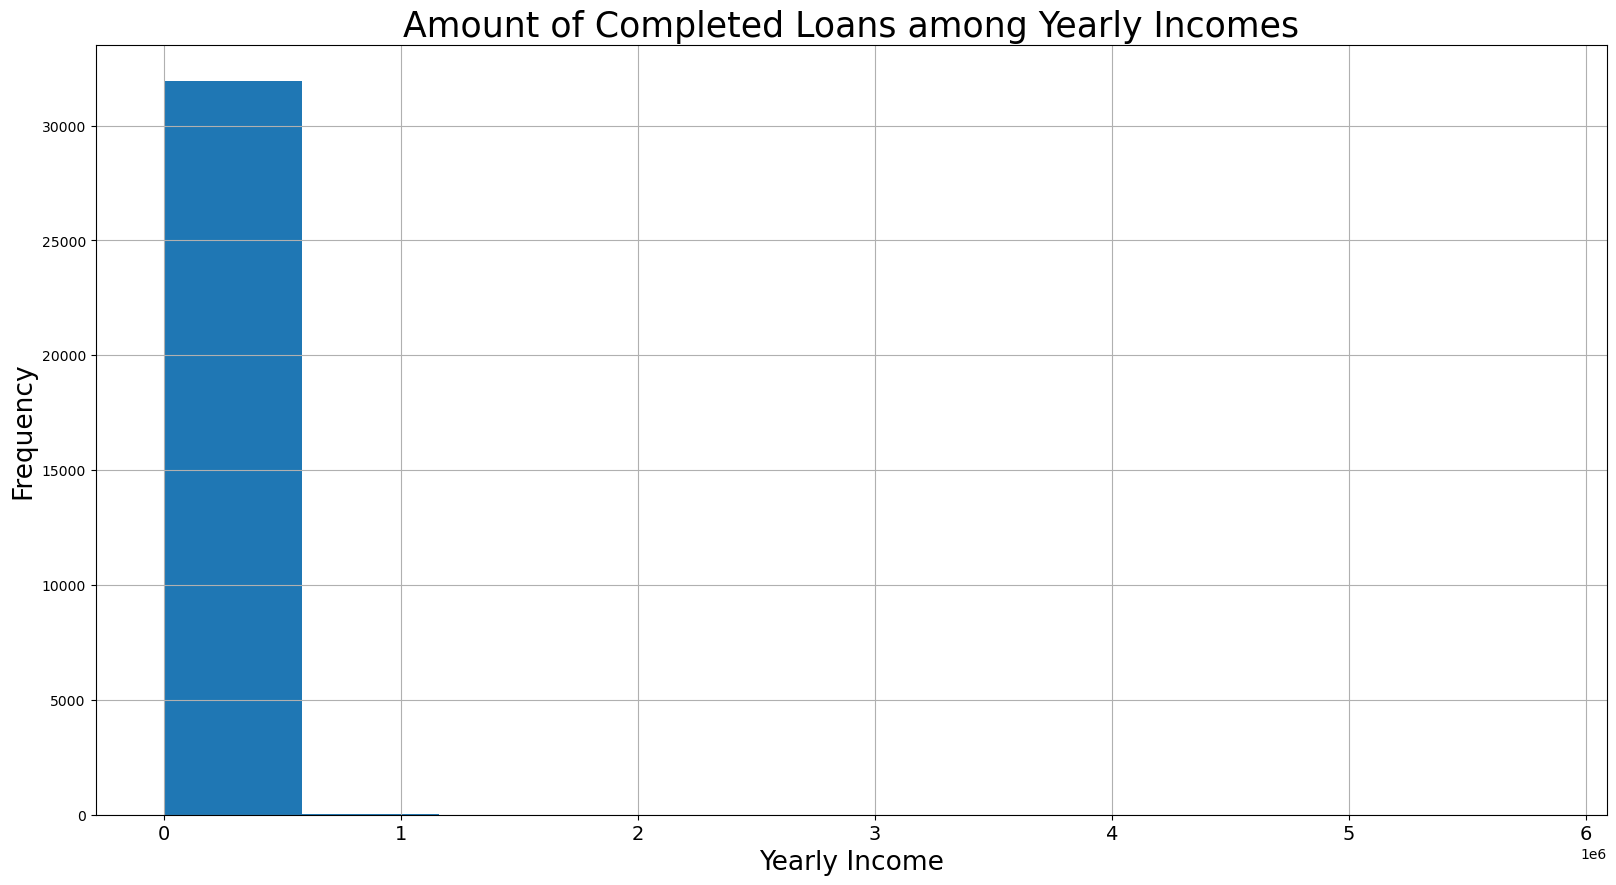

In [7]:
# Code for creating Histogram with amount of Completed Loans among Yearly Incomes

# creates dataframe with Completed loans ONLY
df_prosper_complete_loans_data = df_prosper_loan_data[df_prosper_loan_data["LoanStatus"] == 'Completed']

# creates dataframe with "LoanStatus" & "YearlyIncome" columns of Completed loans ONLY
df_prosper_complete_loans_and_yearly_incomes_data = df_prosper_complete_loans_data[["LoanStatus", "YearlyIncome"]]

# creates & displays Histogram
df_prosper_complete_loans_and_yearly_incomes_data.hist(xlabelsize=14, figsize=(19.5,10))

# adds x-axis label to Histogram
plt.xlabel('Yearly Income', fontsize=19)

# adds y-axis label to Histogram
plt.ylabel('Frequency', fontsize=19)

# adds title to Histogram
plt.title('Amount of Completed Loans among Yearly Incomes', fontsize=25)

## (Visualization 2)

> You should have at least three visualizations in your presentation, but feel free to add more if you'd like!

## (Visualization 3)

> You should have at least three visualizations in your presentation, but feel free to add more if you'd like!

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
